# k-Nearest Neighborhood Algorithm 실습

# 1. 데이터, 모듈 불러오기 및 kNN 피팅 방법

- 함수 불러오기

In [1]:
from sklearn import neighbors,datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # KNN의 분류 영역 표시를 위한 컬러맵

In [6]:
iris = datasets.load_iris()

X = iris.data[:, :2]  # 간편한 실습을 위해 변수 두 개만 사용
y = iris.target

- 모델 구축

In [7]:
clf = neighbors.KNeighborsClassifier(5) # k=5로 지정
clf.fit(X,y)

KNeighborsClassifier()

In [ ]:
# 가장 기본적인 KNN은 단순하게 k만 지정해주면 된다. 
# 이는 학습을 진행할 때, 주변 5개 데이터를 기준으로 범주를 예측한다는 것이다. 
# 즉, 만약 "가장 가까운 5개 중에 A-1,B-1,C-3"이면 타겟데이터는 "C"로 분류될 것이다.

In [8]:
y_pred=clf.predict(X) #fitting결과 target 예측(분류)

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
confusion_matrix(y,y_pred) # confusion_matrix를 활용한 모델예측 정확도 측정

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

In [ ]:
# 위의 confusion matrix에 대해 말하기 전에, target은 범주 0,1,2로 이산형 변수로 이루어져 있다는 것을 알 필요가 있다.  
# 기본적인 KNN의 성능은 "범주0"일 경우 1개의 오답, "범주1"일 경우 12개의 오답, "범주2"일 경우 12개의 오답이 발생한 것을 볼 수 있다.

# 2.Cross-validation을 활용한 최적의 k찾기

In [ ]:
# 위의 결과를 보면, 단순하게 학습에 사용된 데이터를 그대로 예측했음에도 불구하고, 성능이 그리 좋지 못한 것을 볼 수 있다.
# 만약 train-test로 DataSet을 나누면 더 적은 데이터로 학습하기에 성능이 떨어지는 경우가 발생할 수 있고, 
# 또는 너무 train set에만 과적합이 되는 경우를 발생시킬 수 있다. 
#  그렇기에 Cross-Validation을 통한 최적의 K를 도출하는 작업을 진행하고자 한다. 

- 함수 불러오기

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

- CV 진행

In [25]:
k_range = range(1,100)              # k를 1~100까지 고려하여 최적의 k를 찾을 것이다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
	knn = neighbors.KNeighborsClassifier(k)
	scores = cross_val_score(knn,X,y,cv=10,scoring = "accuracy")    # 10-fold cross-validation
	k_score.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산 

In [ ]:
#  위의 코드블럭을 보면, k_range와 k_score 리스트를 만들어 주었다. 그리고 for문을 활용하여 k_range의 KNN을 진행해주면서, 동시에 KNN을 10 Fold Cross-Validation을 적용시킨 것을 확인할 수 있다. 이는 DataSet의 1/10씩 Test데이터로 사용하여 한 가지 k를 구하는데 10번의 KNN을 적용하여 Accuracy를 구하고, 이 Accuracy들의 평균을 K-Fold-Cross-Validation의 Score로 사용한 것이다.

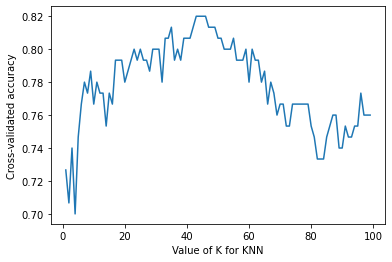

In [28]:
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

In [ ]:
 #위의 그래프는 10-Fold-Cross-Validation의 Score(Mean of Accuracy, 정확도 평균)를 시각화한 것이다. 정확도이기에 가장 높을수록 좋은 k이며 대략 KNN의 k=45가 현재 데이터에 가장 이상적인 k라고 판단할 수 있다.

# 2.Weight를 준 kNN

C:\Users\hyose\AppData\Local\Temp/ipykernel_11068/987129789.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
C:\Users\hyose\AppData\Local\Temp/ipykernel_11068/987129789.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


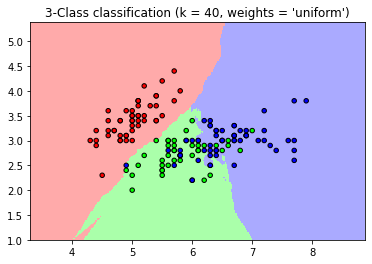

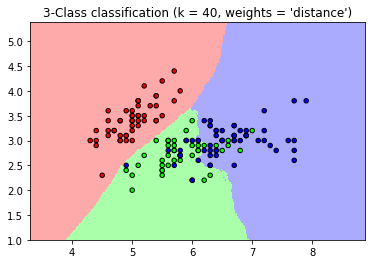

In [29]:
n_neighbors = 40

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

   # Decision Boundary를 위한 meshgrid plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    ## 학습용 데이터의 산점도 표출
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [31]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [ ]:
 #위의 출력된 plot의 결과를 보면, 거리를 가중치로 준 KNN이 분류를 한 영역의 맞닿는 부분(Decision Boundary)들이 자연스러운 것을 볼 수 있다. 이는 위의 그래프보다, 학습의 일반화를 더 잘 시키고, 설명이 더 잘되는 것으로 보인다. 즉, 직관적인 경계면이 나타난다는 것이다. 하지만 동시에, 자세한 점(이상치로 판단)들은 분류를 제대로 못하는 문제가 있다.
 #즉, 항상 가중치를 주는 것이 옳은 것은 아니다. 판단의 척도에 따라 달라지며, 어떤 경우에는 가중치를 주는것이, 다른경우에는 가중치를 주지 않는 것이 더 나은 KNN으로 되기도 한다. 즉 가중치를 주고, 안주고는 Trade-Off(상충관계)에 있는 것이다.    

In [32]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

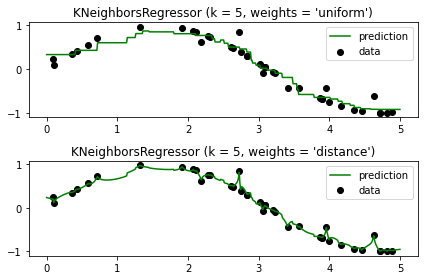

In [33]:
# knn 가중치 부여 및 미부여 비교

n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

In [ ]:
 #위의 figure을 보면, 둘 다 sin함수를 비슷하게 그렸다. 하지만, 분포된 점들은 정확하게 sin함수는 아니다.

#1. 첫 번째 plot(가중치 X)의 경우는 두 번째 plot(가중치 O)의 경우보다 더 sin함수에 가까운 듯 하다.

#2. 두 번째 plot(가중치 O)이 첫 번째 plot(가중치 X)보다 분포된 data를 세세하게 따라간다.

 #이 결과로 보았을 때, 가중치를 부여하면 데이터의 가까운 데이터의 영향을 많이 받아, 직관적인 Desicion을 만들어내는데(sin함수와 가까움) 어려운 것으로 보인다. 

# 이처럼 가중치를 부여하고 안부여하고가 항상 정답이 존재하진 않는다. 애초에 가중치를 부여하고 말고는 분석가의 판단이 개입되는 parameter의 영역이라 경험적 실험이 중요한듯 하다.